## 데이터 불러오기
- 각 tutor의 클래스별 학생들의 점수를 나열한 것
- A(N=15) & B(N=18)

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/harpo.csv")
df.head()

,grade,tutor
0,65,Anastasia
1,72,Bernadette
2,66,Bernadette
3,74,Anastasia
4,73,Anastasia


## 데이터 요약
- 각 클래스 학생들의 데이터 분포 요약
- groupby: 평균(mean), 표준편차(std), 몇명(count)

In [ ]:
score = df.groupby('tutor')['grade'].agg(['mean', 'std', 'count']).reset_index()

,tutor,mean,std,count
0,Anastasia,74.533333,8.998942,15
1,Bernadette,69.055556,5.774918,18


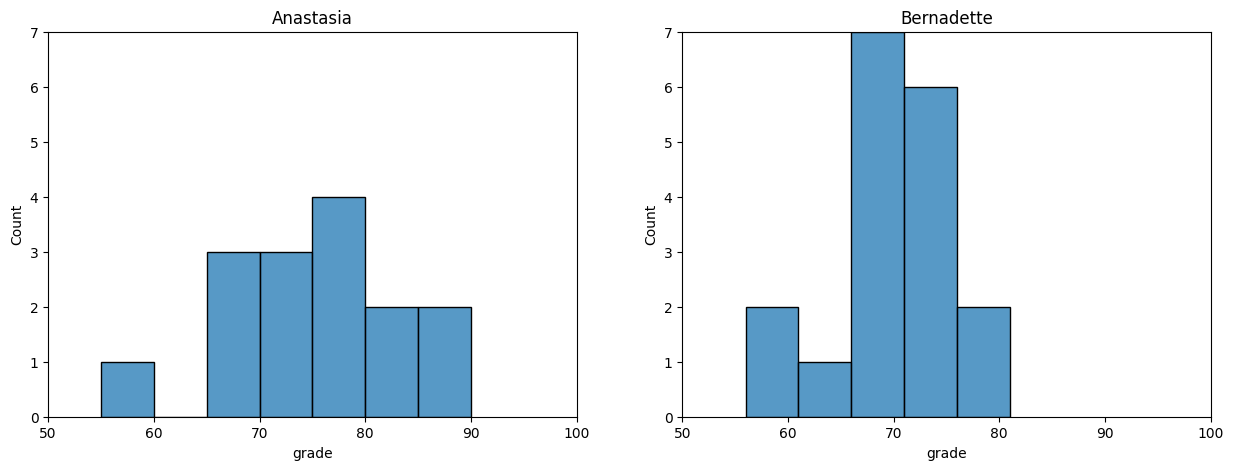

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

Anastasia = pd.DataFrame(df.loc[df['tutor'] == 'Anastasia']['grade']).reset_index(drop=True)
Bernadette = pd.DataFrame(df.loc[df['tutor'] == 'Bernadette']['grade']).reset_index(drop=True)

sns.histplot(Anastasia['grade'], ax = axes[0], binwidth=5)
sns.histplot(Bernadette['grade'], ax = axes[1], binwidth=5)

axes[0].set_xlim(50,100) # x축 설정
axes[1].set_xlim(50,100) # x축 설정

axes[0].set_ylim(0,7) # y축 설정
axes[1].set_ylim(0,7) # y축 설정

axes[0].set_title('Anastasia')
axes[1].set_title('Bernadette')

plt.show()

## pointplot()
- 두 그룹의 학생에 대한 평균과 해당 신뢰구간을 보여준다.
- 구간이 겹치는 것이 적을수록 평균 차이가 심하다


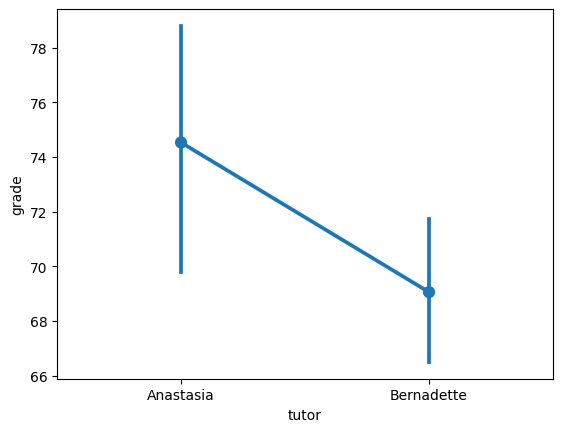

In [ ]:
sns.pointplot(x = 'tutor', y = 'grade', data = df)
plt.show()

In [ ]:
!pip install --upgrade pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=9fb8257a83a83e631a3f891a96afe13cb6ed5300139a6455e4c98a0d22c8ef30
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


## 독립표본 T-검정
- 절차 1 : 정규성 검정
- 절차 2 : 등분산성 검점
- 절차 3 : ttest

In [ ]:
# 정규성 검정
import pingouin as pg
pg.normality(df, dv='grade', group='tutor')

,W,pval,normal
tutor,,,
Anastasia,0.981857,0.980597,True
Bernadette,0.969075,0.780127,True


In [ ]:
# 등분산성 검정
pg.homoscedasticity(data = df, dv='grade', group='tutor')

,W,pval,equal_var
levene,2.128701,0.154622,True


In [ ]:
# ttest
from pingouin import ttest
ttest(Anastasia['grade'], Bernadette['grade'], correction=False) # 통계적 결론: 두 그룹의 평균 차이가 있다. 해석은 그래프에 근거하여 A그룹이 B그룹보다 점수가 더 좋다.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.115432,31,two-sided,0.042529,"[0.2, 10.76]",0.739561,1.755,0.53577


## 대응표본
- 체중 측정
- 식단, 운동 프로그램

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/chico.csv")
df.head()

,id,grade_test1,grade_test2
0,student1,42.9,44.6
1,student2,51.8,54.0
2,student3,71.7,72.3
3,student4,51.6,53.4
4,student5,63.5,63.8


In [ ]:
df.describe()

,grade_test1,grade_test2
count,20.000000,20.000000
mean,56.980000,58.385000
std,6.616137,6.405612
min,42.900000,44.600000
25%,51.750000,53.100000
50%,57.700000,59.700000
75%,62.050000,63.050000
max,71.700000,72.300000


### 데이터 시각화

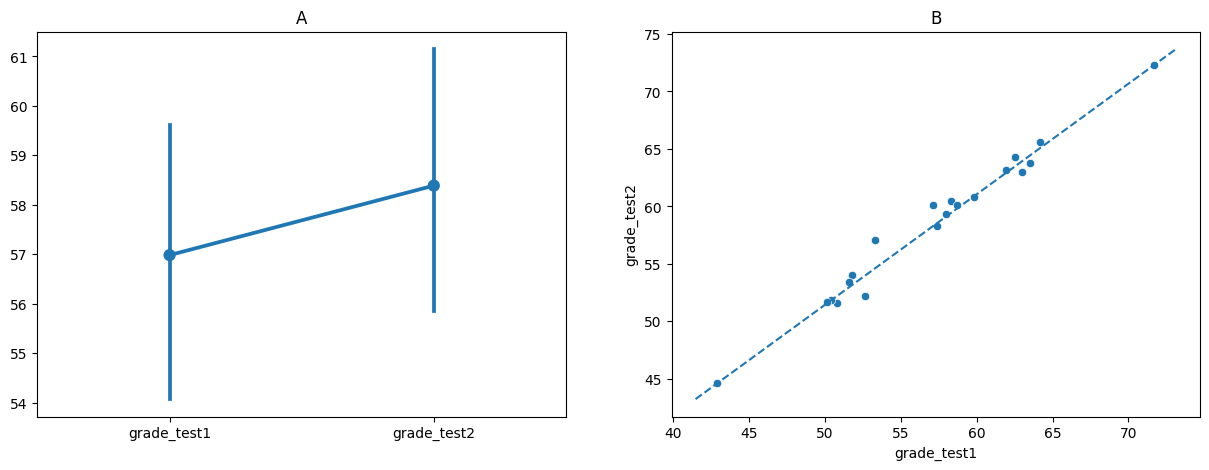

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.pointplot(data = df, ax = ax[0])
sns.scatterplot(x = 'grade_test1' , y = 'grade_test2',data = df, ax = ax[1])

ax[1].plot(ax[1].get_xlim(), ax[1].get_ylim(), ls = '--')

ax[0].set_title('A')
ax[1].set_title('B')

plt.show()

### 데이터 가공
- 실험 전후 차이를 보기 위해

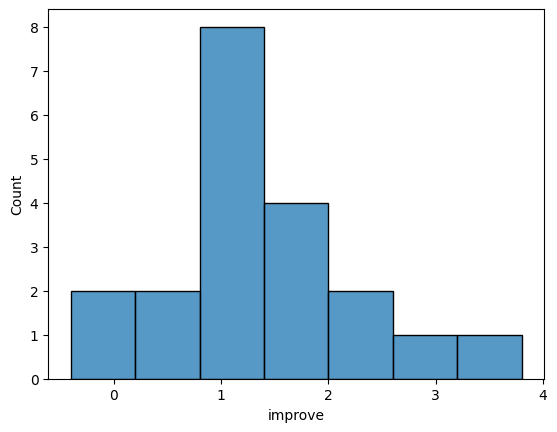

In [ ]:
df2 = df.copy()
df2['improve'] = df2['grade_test2'] - df2['grade_test1']

sns.histplot(data = df2, x = 'improve')
plt.show()

In [ ]:
df2

,id,grade_test1,grade_test2,improve
0,student1,42.9,44.6,1.7
1,student2,51.8,54.0,2.2
2,student3,71.7,72.3,0.6
3,student4,51.6,53.4,1.8
4,student5,63.5,63.8,0.3
5,student6,58.0,59.3,1.3
6,student7,59.8,60.8,1.0
7,student8,50.8,51.6,0.8
8,student9,62.5,64.3,1.8
9,student10,61.9,63.2,1.3


In [ ]:
## pingouin 라이브러리 활용 정규성 검정
import pingouin as pg
pg.normality(df2['improve'])

,W,pval,normal
improve,0.966399,0.677769,True


In [ ]:
from pingouin import ttest
ttest(df2['grade_test2'], df2['grade_test1'], paired=True) # 대응표본 검정을 하겠다.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.475436,19,two-sided,0.000003,"[0.95, 1.86]",0.215765,5991.577,0.150446
